In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import random
import pandas as pd
from google.colab import files

uploaded = files.upload()

KernalSizes = [5, 11, 17]


Saving lq2g.jpg to lq2g.jpg
Saving lq1g.png to lq1g.png
Saving lqg.jpg to lqg.jpg


In [ ]:

imagesFile = '.' # The location of the images file

# This function for loop through images then read them, then print them.
def readDisplayImages(imagesFile):
    listOfImages = []
    imageArray = ['lqg.jpg', 'lq1g.png', 'lq2g.jpg']

    for image in imageArray:

        imagePath = os.path.join(imagesFile, image) # for getting correct path for images
        image = cv2.imread(imagePath, cv2.IMREAD_COLOR)

        if image is not None:
            coloredImage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            listOfImages.append(coloredImage)

            plt.imshow(coloredImage)
            plt.axis('off')
            plt.show()
        else:
            print(f"Error loading image: {image}")

    return listOfImages

images = readDisplayImages(imagesFile)


In the code above, the function readDisplayImages loads a list of specified image files from a specified folder using OpenCV, and uses Matplotlib to display each image.

Using the OS library, it creates the complete file path.

In [ ]:
intensityLevels = {
    "Low": 30,
    "Medium": 45,
    "High": 70
}

# This function add gaussian noise for images
def addGaussianNoise(image, mean=0, std_dev=25):

    gNoise = np.random.normal(mean, std_dev, image.shape).astype('float32') # generate gaussian noise
    gNoisyImage = image.astype('float32') + gNoise # adding gaussian noise
    gNoisyImage = np.clip(gNoisyImage, 0, 255).astype('uint8')

    return gNoisyImage

levelIntensityImages = {}

for level, standardDeviation in intensityLevels.items():
    noisyImages = []

    for i, image in enumerate(images):
        gNoisyImage = addGaussianNoise(image, mean=0, std_dev=standardDeviation) # call the function to add the noise
        noisyImages.append(gNoisyImage)

        plt.title(f"Gaussian Noisy Image ({level} Intensity)")
        plt.imshow(gNoisyImage)
        plt.axis('off')
        plt.show()

    levelIntensityImages[level] = noisyImages


In this section, an array of clean images at three different intensity levels (low, medium, and high) are subjected to Gaussian noise.

It specifies the addGaussianNoise function, which uses a Gaussian (normal) distribution with a given mean and standard deviation to produce random noise.

To simulate real-world noise, the created noise is appended to the input image pixel per pixel. After that, the pixel values are reduced to make sure they stay inside the acceptable range (0 to 255).

The method display each noisy image after iterating through a collection of images and applying Gaussian noise of various strengths as shown in the output (noisy images).


In [ ]:
saltPepperLevels = {
    "Low": 0.01,
    "Medium": 0.05,
    "High": 0.1
}

def addSaltPepperNoise(image, nRatio=0.01):

    imageCopy = image.copy()

    numberOfPixels = image.shape[0] * image.shape[1] # Getting the dimensions of the image
    numberOfNoisyPixels = int(numberOfPixels * nRatio) # Number of noisy pixels

    for _ in range(numberOfNoisyPixels // 2):
        x_coord = random.randint(0, image.shape[0] - 1)
        y_coord = random.randint(0, image.shape[1] - 1)
        imageCopy[x_coord, y_coord] = [255, 255, 255]  # Add salt noise (white pixels)

    for _ in range(numberOfNoisyPixels // 2):
        x_coord = random.randint(0, image.shape[0] - 1)
        y_coord = random.randint(0, image.shape[1] - 1)
        imageCopy[x_coord, y_coord] = [0, 0, 0]  # Add papper noise (Dark pixels)

    return imageCopy

saltPepperNoisyImagesLevels = {}

for level, noiseRatio in saltPepperLevels.items():
    saltPepperNoisyImages = []

    for i, image in enumerate(images):
        saltPepperNoisyImage = addSaltPepperNoise(image, nRatio=noiseRatio)
        saltPepperNoisyImages.append(saltPepperNoisyImage)

        plt.title(f"Salt-and-Pepper Noisy Image ({level} Intensity)")
        plt.imshow(saltPepperNoisyImage)
        plt.axis('off')
        plt.show()

    saltPepperNoisyImagesLevels[level] = saltPepperNoisyImages


This code introduces Salt-and-Pepper noise to a set of images at three different intensity levels: Low (1%), Medium (5%), and High (10%). The addSaltPepperNoise function takes an image and a noise ratio (nRatio), calculates the number of pixels to be altered based on the given ratio, and adds random "salt" (white pixels) and "pepper" (black pixels) noise by replacing pixel values in the image copy.

Equal numbers of white and black noisy pixels are guaranteed by the entire process. A set of images is iterated through, noise is applied for each intensity level, and Matplotlib is used to display the noisy images.

In [ ]:
# Function to apply Box Filter
def addBoxFilter(image, kernel_size):
    return cv2.boxFilter(image, ddepth=-1, ksize=(kernel_size, kernel_size), normalize=True)

for nType, noisyImagesSet in [("Gaussian Noise", levelIntensityImages),
                                   ("Salt-and-Pepper Noise", saltPepperNoisyImagesLevels)]:

    # Iterate over each intensity level (Low, Medium, High)
    for intensityLevel, noisyImages in noisyImagesSet.items():

        for i, noisyImage in enumerate(noisyImages):
            plt.figure(figsize=(18, 6))
            plt.suptitle(f"{nType} ({intensityLevel} Intensity) - Image {i + 1}")

            plt.subplot(1, 4, 1)
            plt.title("Noisy Image")
            plt.imshow(noisyImage)
            plt.axis('off')

            for j, kSize in enumerate(KernalSizes):

                denoised_image = addBoxFilter(noisyImage, kSize)

                plt.subplot(1, 4, j + 2)
                plt.title(f"Box Filter (Kernel {kSize}x{kSize})")
                plt.imshow(denoised_image)
                plt.axis('off')

            plt.tight_layout()
            plt.show()


In this part, we applied the Box Filter to noisy images at three different noise intensity levels (Low, Medium, and High) using kernel sizes of 5x5 (small), 11x11 (medium), and 17x17 (large) to assess its performance in reducing noise while preserving image details.

For low-intensity noise, the 5x5 kernel was generally effective, providing sufficient smoothing with minimal blurring of image details, making it an ideal choice when the primary goal is to maintain image sharpness.

At medium-intensity noise, the 11x11 kernel make a balance between noise reduction and detail preservation, effectively reducing noise while only slightly blurring the edges, making it suitable for handling moderate noise without significant loss of clarity.

For high-intensity noise, the 17x17 kernel was most effective in smoothing out the noise, but it also caused a noticeable loss of finer details and edge sharpness, resulting in a smoother but less defined image (blurred).

The results reveals that as the noise intensity increases, a larger kernel size becomes necessary to achieve significant noise reduction. However, this also leads to increased blurring, highlighting the trade-off between noise suppression and detail preservation.


In [ ]:
# Function to apply Gaussian Filter
def addGaussianFilter(image, kernel_size):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), sigmaX=0)

for nType, noisyImagesSet in [("Gaussian Noise", levelIntensityImages),
                                   ("Salt-and-Pepper Noise", saltPepperNoisyImagesLevels)]:

    # Iterate over each intensity level (Low, Medium, High)
    for intensityLevel, noisyImages in noisyImagesSet.items():

        # Iterate over each noisy image
        for i, noisyImage in enumerate(noisyImages):
            plt.figure(figsize=(18, 6))
            plt.suptitle(f"{nType} ({intensityLevel} Intensity) - Image {i + 1}")

            plt.subplot(1, 4, 1)
            plt.title("Noisy Image")
            plt.imshow(noisyImage)
            plt.axis('off')

            # Apply Gaussian Filter with different kernel sizes
            for j, kSize in enumerate(KernalSizes):
                denoised_image = addGaussianFilter(noisyImage, kSize)

                plt.subplot(1, 4, j + 2)
                plt.title(f"Gaussian Filter (Kernel {kSize}x{kSize})")
                plt.imshow(denoised_image)
                plt.axis('off')

            plt.tight_layout()
            plt.show()


In this part, The Gaussian Filter applaied to noisy images at three different noise intensity levels (Low, Medium, and High) using kernel sizes of 5x5 (small), 11x11 (medium), and 17x17 (large) to evaluate its effectiveness in noise reduction and detail preservation.

The Gaussian Filter utilizes a weighted averaging approach, where pixels closer to the center of the kernel have higher weights, allowing for smoother noise reduction while better preserving edges compared to a simple Box Filter.

For low-intensity noise, the 5x5 kernel provided effective smoothing with minimal blurring, making it suitable for reducing slight noise while maintaining sharpness and fine details.

At medium-intensity noise, the 11x11 kernel offered a good balance, significantly reducing noise while maintaining edge details, resulting in a cleaner image without substantial loss of clarity.

For high-intensity noise, the 17x17 kernel achieved the most pronounced noise reduction, effectively smoothing out heavy noise. However, this larger kernel also led to increased blurring, causing a loss of finer details and some edge details.

The results indicate that the Gaussian Filter is more adept at handling various noise levels compared to the Box Filter due to its weighted averaging and more control for tunning, which helps preserve edges better. As the noise intensity increases, using a larger kernel size improves noise reduction but at the cost of increased blurring.

In [ ]:
# Function to apply Median Filter
def addMedianFilter(image, kernel_size):
    return cv2.medianBlur(image, kernel_size)


for nType, noisyImagesSet in [("Gaussian Noise", levelIntensityImages),
                                   ("Salt-and-Pepper Noise", saltPepperNoisyImagesLevels)]:

    # Iterate over each intensity level (Low, Medium, High)
    for intensityLevel, noisyImages in noisyImagesSet.items():

        # Iterate over each noisy image
        for i, noisyImage in enumerate(noisyImages):
            plt.figure(figsize=(18, 6))
            plt.suptitle(f"{nType} ({intensityLevel} Intensity) - Image {i + 1}")

            plt.subplot(1, 4, 1)
            plt.title("Noisy Image")
            plt.imshow(noisyImage)
            plt.axis('off')

            # Apply Median Filter with different kernel sizes
            for j, kSize in enumerate(KernalSizes):
                denoised_image = addMedianFilter(noisyImage, kSize)

                plt.subplot(1, 4, j + 2)
                plt.title(f"Median Filter (Kernel {kSize}x{kSize})")
                plt.imshow(denoised_image)
                plt.axis('off')

            plt.tight_layout()
            plt.show()


In this part, the Median Filter was applied to noisy images at three different noise intensity levels (Low, Medium, and High) using kernel sizes of 5x5 (small), 11x11 (medium), and 17x17 (large) to assess its performance in noise reduction and detail preservation.

The Median Filter is a non-linear filtering technique that replaces each pixel's value with the median value of its neighboring pixels. the Median Filter is highly effective in reducing Salt-and-Pepper noise as shown in the results. it can eliminate outlier pixels without averaging their intensity. This makes it particularly suitable for preserving edges while reducing impulsive noise.

For low-intensity noise, the 5x5 kernel provided effective noise reduction with minimal blurring, successfully preserving fine details and edges. It was sufficient for reducing slight noise while maintaining the image's sharpness, making it a suitable choice for images with lower noise levels.

At medium-intensity noise, the 11x11 kernel offered a good balance between noise reduction and detail preservation. It significantly reduced the noise, making the image appear cleaner, while still maintaining edge details. This kernel size was effective in handling moderate noise without causing substantial blurring.

For high-intensity noise, the 17x17 kernel achieved the most effective noise reduction, especially in images severely affected by Salt-and-Pepper noise. The larger kernel size allowed the filter to smooth out the noise more effectively by considering a broader neighborhood for calculating the median value. However, this also led to increased blurring of fine details, resulting in a slightly smoother and less sharp image.

The Median Filter effectively reduces Salt-and-Pepper noise at various levels by removing outlier pixels, preserving edges better than Box or Gaussian filters. Higher noise levels require a larger kernel size for effective noise reduction, though this may increase blurring.

In [ ]:
# Function to apply Adaptive Mean Filter
def addAdaptiveMeanFilter(image, kernel_size):

    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) # Convert image to grayscale if it is in RGB

    paddingSize = kernel_size // 2
    paddingImage = np.pad(image, paddingSize, mode='reflect')
    filteredImage = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighborhood = paddingImage[i:i + kernel_size, j:j + kernel_size]
            localMean = np.mean(neighborhood) # Calculate the local mean
            filteredImage[i, j] = localMean # Assign the local mean value to the central pixel

    return filteredImage.astype(np.uint8)

for nType, noisyImagesSet in [("Gaussian Noise", levelIntensityImages),
                                   ("Salt-and-Pepper Noise", saltPepperNoisyImagesLevels)]:

    for intensityLevel, noisyImages in noisyImagesSet.items():
        print(f"\nProcessing Intensity Level: {intensityLevel}")

        for i, noisyImage in enumerate(noisyImages):
            plt.figure(figsize=(18, 6))
            plt.suptitle(f"{nType} ({intensityLevel} Intensity) - Image {i + 1}")

            plt.subplot(1, 4, 1)
            plt.title("Noisy Image")
            plt.imshow(noisyImage, cmap='gray')
            plt.axis('off')

            for i, kSize in enumerate(KernalSizes):
                denoised_image = addAdaptiveMeanFilter(noisyImage, kSize)

                plt.subplot(1, 4, i + 2)
                plt.title(f"Adaptive Mean Filter (Kernel {kSize}x{kSize})")
                plt.imshow(denoised_image, cmap='gray')
                plt.axis('off')

            plt.tight_layout()
            plt.show()


In this part, the Adaptive Mean Filter was applied to noisy images at three different noise intensity levels (Low, Medium, and High) using kernel sizes of 5x5 (small), 11x11 (medium), and 17x17 (large) to evaluate its noise reduction capability and detail preservation.

The Adaptive Mean Filter works by dynamically computing the mean of pixel intensities within a local neighborhood (kernel window) around each pixel. adjusts based on local variations, considering the mean value specific to each neighborhood.

For low-intensity noise, the 5x5 kernel provided effective smoothing with minimal impact on the image's sharpness and fine details, making it suitable for reducing slight noise without introducing significant blurring.

At medium-intensity noise, the 11x11 kernel offered a balanced approach, significantly reducing noise while maintaining the overall clarity of edges and textures.

The 17x17 kernel effectively reduced high-intensity noise by extensive smoothing, though it slightly blurred fine details. The Adaptive Mean Filter preserved edges better than traditional mean filters by adapting to local image variations instead of uniform averaging.

In [ ]:
def addAdaptiveMedianFilter(image, Smax):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    paddingSize = Smax // 2
    paddedImage = np.pad(image, paddingSize, mode='reflect')
    filteredImage = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            S = 5
            while S <= Smax:
                pad = S // 2
                neighborhood = paddedImage[i:i + S, j:j + S]

                # Calculate minimum, median, and maximum in the window
                Z_min = np.min(neighborhood)
                Z_med = np.median(neighborhood)
                Z_max = np.max(neighborhood)
                Z_xy = paddedImage[i + pad, j + pad]

                # Stage A: Check the median value, then Stage B: Check the pixel value
                if Z_min < Z_med < Z_max:
                    if Z_min < Z_xy < Z_max:
                        filteredImage[i, j] = Z_xy
                    else:
                        filteredImage[i, j] = Z_med
                    break
                else:
                    S += 2

            # If maximum window size is reached, assign the median value
            if S > Smax:
                filteredImage[i, j] = Z_med

    return filteredImage.astype(np.uint8)

max_kernel_sizes = [5, 11, 17]

for ntype, noisyImagesSet in [("Gaussian Noise", levelIntensityImages),
                                   ("Salt-and-Pepper Noise", saltPepperNoisyImagesLevels)]:

    for intensityLevel, noisyImages in noisyImagesSet.items():

        for i, noisyImage in enumerate(noisyImages):
            plt.figure(figsize=(18, 12))
            plt.suptitle(f"{ntype} ({intensityLevel} Intensity) - Image {i + 1}")

            plt.subplot(1, 4, 1)
            plt.title("Noisy Image")
            plt.imshow(noisyImage, cmap='gray')
            plt.axis('off')

            for idx, S_max in enumerate(max_kernel_sizes):
                denoisedImage = addAdaptiveMedianFilter(noisyImage, S_max)

                plt.subplot(1, 4, idx + 2)
                plt.title(f"Adaptive Median (Max S = {S_max}x{S_max})")
                plt.imshow(denoisedImage, cmap='gray')
                plt.axis('off')

            plt.tight_layout()
            plt.show()


This code defines an addAdaptiveMedianFilter function that applies an adaptive median filter to an images.

which is particularly useful for reducing noise while preserving edges. The filter iterates over each pixel, examining a neighborhood around it. Starting with a small kernel size, it calculates the minimum, median, and maximum intensity values within the kernel window.

This code applies an Adaptive Median Filter to denoise images, particularly effective against Salt-and-Pepper Noise. replacing noisy pixels with the median while preserving edges.

In [ ]:
# Function to apply Bilateral Filter
def applyBilateralFilter(image, diameter, sigma_color, sigma_space):
    return cv2.bilateralFilter(image, d=diameter, sigmaColor=sigma_color, sigmaSpace=sigma_space)

# Define Bilateral Filter parameters
sigma_color = 50
sigma_space = 50

for nType, noisyImagesSet in [("Gaussian Noise", levelIntensityImages),
                                   ("Salt-and-Pepper Noise", saltPepperNoisyImagesLevels)]:

    for intensityLevel, noisyImages in noisyImagesSet.items():

        # Iterate over each noisy image
        for i, noisyImage in enumerate(noisyImages):
            plt.figure(figsize=(18, 6))
            plt.suptitle(f"{nType} ({intensityLevel} Intensity) - Image {i + 1}")

            plt.subplot(1, 4, 1)
            plt.title("Noisy Image")
            plt.imshow(noisyImage, cmap='gray')
            plt.axis('off')

            for i, kSize in enumerate(KernalSizes):
                diameter = kSize
                denoisedImage = applyBilateralFilter(noisyImage, diameter, sigma_color, sigma_space)

                plt.subplot(1, 4, i + 2)
                plt.title(f"Bilateral Filter (Kernel {kSize}x{kSize})")
                plt.imshow(denoisedImage, cmap='gray')
                plt.axis('off')

            plt.tight_layout()
            plt.show()


The results with different kernel sizes reveal that smaller kernels (5x5) perform moderate noise reduction while preserving edges more effectively, making them suitable for images with lower noise intensity or where detail preservation is a priority. Medium-sized kernels (11x11) offer a balance by providing better noise suppression without excessively smoothing the edges, making them ideal for images with moderate noise intensity. Larger kernels (17x17) deliver stronger noise reduction by encompassing a broader neighborhood, however, they can introduce some blurring to edges and fine details, which is more noticeable with higher noise levels.

In [ ]:
# calculate Mean Squared Error (MSE)
def calculateMSE(original, denoised):
    if len(original.shape) == 3:
        original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    if len(denoised.shape) == 3:
        denoised = cv2.cvtColor(denoised, cv2.COLOR_BGR2GRAY)

    # Resize the denoised image to match the original image dimensions
    if original.shape != denoised.shape:
        denoised = cv2.resize(denoised, (original.shape[1], original.shape[0]))

    return np.mean((original - denoised) ** 2)

# calculate Peak Signal to Noise Ratio (PSNR)
def calculatePSNR(mse):
    if mse == 0:
        return float('inf')
    maxPixel = 255.0
    return 20 * np.log10(maxPixel / np.sqrt(mse))


results = []

for nType, noisyImagesSet in [("Gaussian Noise", levelIntensityImages),
                              ("Salt-and-Pepper Noise", saltPepperNoisyImagesLevels)]:

    for intensityLevel, noisyImages in noisyImagesSet.items():
        for i, noisyImage in enumerate(noisyImages):
            if i < len(images):
                original_image = images[i]
            else:
                print(f"No matching original image found for noisy image {i + 1}. Skipping.")
                continue

            for filterName, filterMethod in [
                ("Box Filter", addBoxFilter),
                ("Gaussian Filter", addGaussianFilter),
                ("Median Filter", addMedianFilter),
                ("Adaptive Mean Filter", addAdaptiveMeanFilter),
                ("Adaptive Median Filter", addAdaptiveMedianFilter),
                ("Bilateral Filter", lambda img, kSize: applyBilateralFilter(img, kSize, sigma_color=50, sigma_space=50))
            ]:
                for kSize in KernalSizes:
                    denoisedImage = filterMethod(noisyImage, kSize)
                    mse = calculateMSE(original_image, denoisedImage)
                    psnr = calculatePSNR(mse)

                    print(f"\nNoise Type: {nType}, Intensity Level: {intensityLevel}, Image: Image {i + 1}")
                    print(f"Filter: {filterName}, Kernel Size: {kSize}x{kSize}")
                    print(f"MSE: {mse:.2f}, PSNR: {psnr:.2f} dB\n")

                     # Store results
                    results.append({
                        "Noise Type": nType,
                        "Intensity Level": intensityLevel,
                        "Image Index": f"Image {i + 1}",
                        "Filter": filterName,
                        "Kernel Size": f"{kSize}x{kSize}",
                        "MSE": mse,
                        "PSNR (dB)": psnr
                    })

# Create a DataFrame from the results
df_results = pd.DataFrame(results)

print("\nMSE and PSNR Comparison Table:")

pd.set_option('display.max_rows', None)
print(df_results)
pd.reset_option('display.max_rows')

df_results.to_csv("MSE_PSNR_Comparison.csv", index=False)


Noise Type: Gaussian Noise, Intensity Level: Low, Image: Image 1
Filter: Box Filter, Kernel Size: 5x5
MSE: 56.11, PSNR: 30.64 dB


Noise Type: Gaussian Noise, Intensity Level: Low, Image: Image 1
Filter: Box Filter, Kernel Size: 11x11
MSE: 64.66, PSNR: 30.02 dB


Noise Type: Gaussian Noise, Intensity Level: Low, Image: Image 1
Filter: Box Filter, Kernel Size: 17x17
MSE: 73.19, PSNR: 29.49 dB


Noise Type: Gaussian Noise, Intensity Level: Low, Image: Image 1
Filter: Gaussian Filter, Kernel Size: 5x5
MSE: 55.78, PSNR: 30.67 dB


Noise Type: Gaussian Noise, Intensity Level: Low, Image: Image 1
Filter: Gaussian Filter, Kernel Size: 11x11
MSE: 56.21, PSNR: 30.63 dB


Noise Type: Gaussian Noise, Intensity Level: Low, Image: Image 1
Filter: Gaussian Filter, Kernel Size: 17x17
MSE: 61.61, PSNR: 30.23 dB


Noise Type: Gaussian Noise, Intensity Level: Low, Image: Image 1
Filter: Median Filter, Kernel Size: 5x5
MSE: 54.64, PSNR: 30.76 dB


Noise Type: Gaussian Noise, Intensity Level: Low, Image:

Discussion:

Noise removal:

The effectiveness of the filters in noise removal was assessed using Mean Squared Error (MSE) and Peak Signal-to-Noise Ratio (PSNR) metrics across varying kernel sizes (small, medium, and large) and noise levels (low, medium, and high).

Among the simple filters, the Median Filter consistently demonstrated superior performance, achieving lower MSE and higher PSNR values, particularly for Salt-and-Pepper noise. This is attributed to its non-linear operation, which effectively removes impulse noise while preserving edges. The Gaussian Filter, with its weighted averaging, showed balanced results for Gaussian noise, excelling in smoothing while moderately preserving detail. Conversely, the Box Filter exhibited the least effectiveness, as its uniform averaging blurred both noise and image details.

For advanced filters, the Bilateral Filter outperformed others, particularly for high-intensity Salt-and-Pepper noise. It maintained high PSNR and low MSE values across all kernel sizes due to its edge-preserving characteristics, which smooth regions while retaining edges. The Adaptive Median Filter was notably effective for medium and high noise levels, although its performance declined for larger kernel sizes due to excessive smoothing. The Adaptive Mean Filter, while less effective overall, provided consistent results for Gaussian noise with a steady trade-off between noise reduction and detail retention.

Note: there is an excel sheet that have all the values in clear manner

In [ ]:
# calculate Edge Preservation Ratio with normalization using Canny edge detection thresholds
def calculateEdgePreservation(original, denoised):
    originalEdges = cv2.Canny(original, 50, 150)
    denoisedEdges = cv2.Canny(denoised, 50, 150)

    overlap = np.logical_and(originalEdges, denoisedEdges).sum()
    normalizedRatio = overlap / max(originalEdges.sum(), denoisedEdges.sum())
    return normalizedRatio

def displayEdgeMaps(original_edges, denoised_edges, filterName, kSize, noiseType, intensityLevel, imageIndex):
    plt.figure(figsize=(12, 6))
    plt.suptitle(f"{filterName} | Kernel Size: {kSize}x{kSize} | Noise: {noiseType} | Intensity: {intensityLevel} | Image {imageIndex + 1}")

    # Display Original Edge Map
    plt.subplot(1, 2, 1)
    plt.title("Original Image Edges")
    plt.imshow(original_edges, cmap='gray')
    plt.axis('off')

    # Display Denoised Edge Map
    plt.subplot(1, 2, 2)
    plt.title(f"Denoised Image Edges ({filterName})")
    plt.imshow(denoised_edges, cmap='gray')
    plt.axis('off')

    plt.show()

for nType, noisyImagesSet in [("Gaussian Noise", levelIntensityImages),
                              ("Salt-and-Pepper Noise", saltPepperNoisyImagesLevels)]:

    for intensityLevel, noisyImages in noisyImagesSet.items():
        for i, noisyImage in enumerate(noisyImages):
            if i < len(images):
                original_image = images[i]
            else:
                print(f"No matching original image found for noisy image {i + 1}. Skipping.")
                continue

            # Convert images to grayscale for consistency
            original_gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY) if original_image.ndim == 3 else original_image
            noisy_gray = cv2.cvtColor(noisyImage, cv2.COLOR_BGR2GRAY) if noisyImage.ndim == 3 else noisyImage

            original_edges = cv2.Canny(original_gray, 50, 150)

            for filterName, filterMethod in [
                ("Box Filter", addBoxFilter),
                ("Gaussian Filter", addGaussianFilter),
                ("Median Filter", addMedianFilter),
                ("Adaptive Mean Filter", addAdaptiveMeanFilter),
                ("Adaptive Median Filter", addAdaptiveMedianFilter),
                ("Bilateral Filter", lambda img, kSize: applyBilateralFilter(img, kSize, sigma_color=75, sigma_space=75))
            ]:
                for kSize in KernalSizes:
                    denoisedImage = filterMethod(noisyImage, kSize)
                    denoised_gray = cv2.cvtColor(denoisedImage, cv2.COLOR_BGR2GRAY) if denoisedImage.ndim == 3 else denoisedImage

                    denoised_edges = cv2.Canny(denoised_gray, 50, 150)

                    edgePreservation = calculateEdgePreservation(original_gray, denoised_gray)

                    displayEdgeMaps(original_edges, denoised_edges, filterName, kSize, nType, intensityLevel, i)

                    print(f"\nNoise Type: {nType}, Intensity Level: {intensityLevel}, Image: Image {i + 1}")
                    print(f"Filter: {filterName}, Kernel Size: {kSize}x{kSize}")
                    print(f"Edge Preservation Ratio: {edgePreservation:.6f}\n")


**Discussion:**

**Edge preservation:**

**Simple Filters:**

**Box Filter:**

Displayed poor edge preservation across all kernel sizes and noise types.

Larger kernel sizes significantly reduced the edge preservation ratio, leading to blurred edges and loss of fine details.

**Gaussian Filter:**

Demonstrated better edge preservation compared to the Box Filter, particularly for small kernel sizes.

increasing the kernel size reduced its ability to maintain edge details, especially for high noise intensities.

**Median Filter:**

Strong performer for Salt-and-Pepper noise, with the highest edge preservation ratios among the simple filters.

Larger kernel sizes reduced edge preservation, but the loss was less pronounced compared to the Box and Gaussian filters.

___________________________________________________________________________
**Advanced Filters:**

**Adaptive Mean Filter:**

Provided inconsistent edge preservation, especially with larger kernel sizes where the ratio dropped significantly.

More effective at maintaining edges for Gaussian noise compared to Salt-and-Pepper noise.

**Adaptive Median Filter:**

Showed stable edge preservation across kernel sizes and noise levels.

Particularly effective for Salt-and-Pepper noise, maintaining sharpness even at higher noise intensities.

**Bilateral Filter:**

The best performer in terms of edge preservation, with minimal loss even for large kernel sizes.

Maintained sharp edges while effectively removing both Gaussian and Salt-and-Pepper noise, making it the most robust filter for edge-sensitive applications.
___________________________________________________________________________

The impact of kernel size varies across filters. Small kernels are excellent at preserving edges, especially for Gaussian, Median, and Bilateral filters. Medium kernels strike a balance between noise reduction and edge preservation, though some edge details are lost. Large kernels significantly reduce edge sharpness, except for the Bilateral filter, which retains its performance.


Noise Type: Gaussian Noise, Intensity Level: Low, Image: Image 1
Filter: Box Filter, Kernel Size: 5x5
Computational Time: 0.0025 seconds


Noise Type: Gaussian Noise, Intensity Level: Low, Image: Image 1
Filter: Box Filter, Kernel Size: 11x11
Computational Time: 0.0031 seconds


Noise Type: Gaussian Noise, Intensity Level: Low, Image: Image 1
Filter: Box Filter, Kernel Size: 17x17
Computational Time: 0.0037 seconds


Noise Type: Gaussian Noise, Intensity Level: Low, Image: Image 1
Filter: Gaussian Filter, Kernel Size: 5x5
Computational Time: 0.0019 seconds


Noise Type: Gaussian Noise, Intensity Level: Low, Image: Image 1
Filter: Gaussian Filter, Kernel Size: 11x11
Computational Time: 0.0056 seconds


Noise Type: Gaussian Noise, Intensity Level: Low, Image: Image 1
Filter: Gaussian Filter, Kernel Size: 17x17
Computational Time: 0.0085 seconds


Noise Type: Gaussian Noise, Intensity Level: Low, Image: Image 1
Filter: Median Filter, Kernel Size: 5x5
Computational Time: 0.0087 seconds




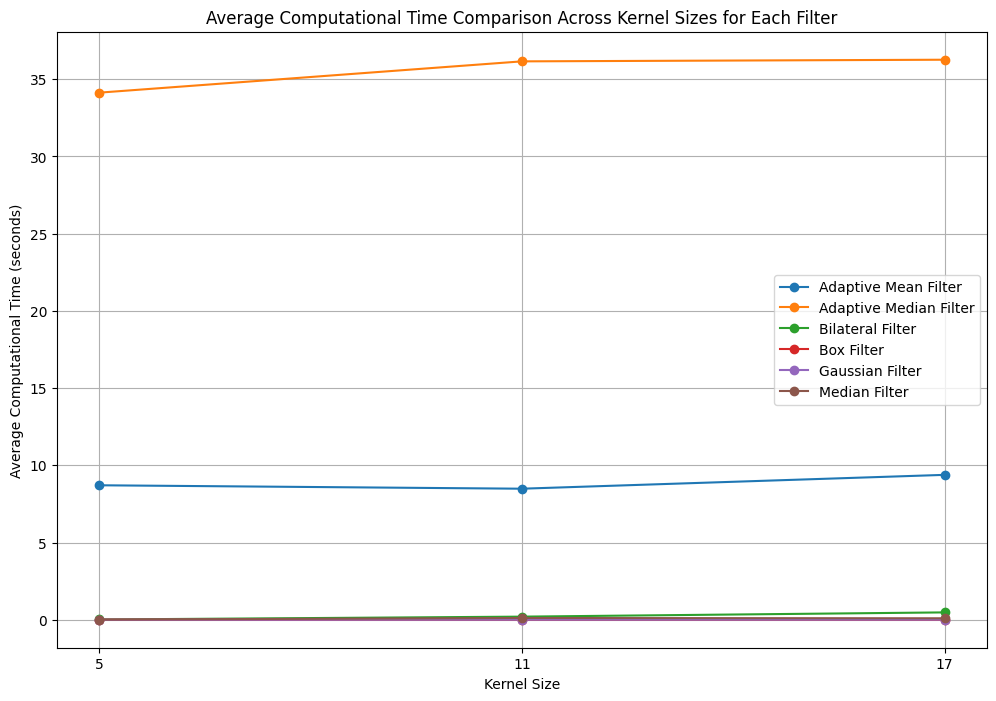

In [ ]:
import time

time_data = []

for nType, noisyImagesSet in [("Gaussian Noise", levelIntensityImages),
                              ("Salt-and-Pepper Noise", saltPepperNoisyImagesLevels)]:

    for intensityLevel, noisyImages in noisyImagesSet.items():
        for i, noisyImage in enumerate(noisyImages):
            if i < len(images):
                original_image = images[i]
            else:
                print(f"No matching original image found for noisy image {i + 1}. Skipping.")
                continue

            for filter_name, filter_function in [
                ("Box Filter", addBoxFilter),
                ("Gaussian Filter", addGaussianFilter),
                ("Median Filter", addMedianFilter),
                ("Adaptive Mean Filter", addAdaptiveMeanFilter),
                ("Adaptive Median Filter", addAdaptiveMedianFilter),
                ("Bilateral Filter", lambda img, kSize: applyBilateralFilter(img, kSize, sigma_color=75, sigma_space=75))
            ]:
                for kSize in KernalSizes:
                    start_time = time.time()
                    denoised_image = filter_function(noisyImage, kSize)
                    end_time = time.time()

                    computational_time = end_time - start_time

                    # Append the results to the list
                    time_data.append({
                        "Filter Name": filter_name,
                        "Kernel Size": kSize,
                        "Computational Time (s)": computational_time
                    })

                    # Print the computational time for each filter
                    print(f"\nNoise Type: {nType}, Intensity Level: {intensityLevel}, Image: Image {i + 1}")
                    print(f"Filter: {filter_name}, Kernel Size: {kSize}x{kSize}")
                    print(f"Computational Time: {computational_time:.4f} seconds\n")

# Create a DataFrame for the time data
time_df = pd.DataFrame(time_data)
average_time_df = time_df.groupby(["Filter Name", "Kernel Size"], as_index=False).mean()

print("\nAverage Computational Time Data:")
print(average_time_df)

plt.figure(figsize=(12, 8))
filters = average_time_df["Filter Name"].unique()

for filter_name in filters:
    filter_data = average_time_df[average_time_df["Filter Name"] == filter_name]

    kernel_sizes = filter_data["Kernel Size"]
    avg_times = filter_data["Computational Time (s)"]

    plt.plot(kernel_sizes, avg_times, marker='o', label=filter_name)

plt.title("Average Computational Time Comparison Across Kernel Sizes for Each Filter")
plt.xlabel("Kernel Size")
plt.ylabel("Average Computational Time (seconds)")
plt.legend()
plt.grid(True)
plt.xticks(KernalSizes)
plt.show()

**Discussion**

**Computational efficiency:**

**Box Filter:**

The computational time scales linearly with kernel size, maintaining efficiency across all sizes.

**Gaussian Filter:**

Computational time increases moderately with kernel size due to its weighted operations.

Balances processing speed and performance, making it ideal for smoothing without a significant edge loss.

**Median Filter:**

Significant time increase with larger kernels due to sorting operations.

Provides strong noise reduction but can become computationally expensive for larger kernel sizes.

**Bilateral Filter:**

Computational time grows rapidly with kernel size due to its intensity and spatial calculations.

**Adaptive Mean Filter:**

Consistently high computational time regardless of kernel size.

**Adaptive Median Filter:**

The most computationally expensive, with a minimal difference in time between kernel sizes.

Designed for intensive noise correction in non-time-critical scenarios.
_______________________________________________________________________________

**Trade-offs Between Processing Speed and Performance:**


There are notable trade-offs between processing speed and performance when selecting filters. Simple filters like the Box and Gaussian filters offer excellent computational efficiency, making them ideal for tasks with strict time constraints. However, their performance may fall short in handling complex noise types. On the other hand, high-performance filters such as the Bilateral and Adaptive Median filters provide superior noise handling and edge preservation, but they come with significantly higher computational times, making them more suitable for offline processing or high-power systems. Additionally, kernel size plays a critical role, as larger kernels improve noise reduction but also increase computational demand.

_______________________________________________________________________________

Discussion about 3 Cases :

(1) Kernel size effect.

(2) Effect of kernel size.

(3)Kernel size sensitivity.
________________________________________________________________________________

**(1) Kernel size effect**

**A) Noise Reduction:**

Box Filter: Larger kernel sizes lead to increased MSE (reduced noise reduction performance) and slightly lower PSNR values.

**Gaussian Filter:**
The Gaussian Filter performs better than the Box Filter as the kernel size increases, with only a small drop in PSNR compared to most other filters.

**Median Filter:**

Effective at small and medium kernel sizes, but larger kernels result in slightly reduced performance.

**Adaptive Filters:**

Significant reduction in noise removal capability with larger kernels, especially adaptive mean filters.

_______________________________________________________________________________
**B) Edge Preservation:**

**Bilateral Filter:**

Best edge preservation across all kernel sizes

**Gaussian Filter**:

Edge preservation reduces significantly for larger kernel sizes.

**Box Filter & Adaptive Mean Filter:**

Poor edge preservation at medium to large kernel sizes.

**Median Filter**:

Effective at small sizes, but declines for larger kernels.

**Adaptive Median Filter:**

Generally poor at preserving edges across all sizes.

______________________________________________________________________________
**C) Processing Speed:**

Box and Gaussian Filters: Processing time increases marginally with kernel size.

Median and Adaptive Filters: Significant increase in processing time as kernel size grows, especially for adaptive filters.

**(2) Effect of kernel size**

Different filters have different effects of kernel size on edge preservation and noise reduction. Regardless of kernel size, bilateral filters provide the best balance between robust noise removal and superior edge preservation. Compared to Box Filters, Gaussian Filters maintain a better balance by performing well with small kernels and degrading moderately with larger sizes.At small and medium kernel sizes, median filters are good at removing noise, but as kernel sizes grow, they lose their ability to preserve edges. On the other hand, Box Filters and Adaptive Mean Filters lose their ability to remove noise and retain edges when kernel size increases. Adaptive median filters, even with smaller kernels, show little improvement in their ability to balance edge preservation and noise reduction. In general, most filters perform better with smaller kernels, with the exception of the Bilateral Filter, which performs well at all sizes.

**(3) Kernel size sensitivity**

The sensitivity of filters to changes in kernel size varies, which impacts which applications they are suitable for. The least sensitive filters are bilateral filters, which are robust and versatile due to their strong noise reduction and edge preservation at all sizes. For the majority of applications, Gaussian filters provide a good balance between moderate sensitivity and controlled performance degradation as kernel size increases. With small to medium kernel sizes, median filters work well, however, at larger sizes, they lose their ability to preserve edges. Box filters and adaptive mean filters, on the other hand, are only useful for coarse smoothing tasks due to their high sensitivity and notable losses in noise reduction and edge retention at larger kernel sizes. Adaptive median filters are less useful because of their low sensitivity and constant edge preservation issues. While robust filters like the Bilateral Filter eliminate the need for exact tuning, very sensitive filters require careful kernel size selection.

**Exploring trade-offs:**

Each filter balances noise reduction, edge preservation, and computational cost differently. Bilateral Filters excel in both noise reduction and edge preservation but are costly. Gaussian Filters offer a good balance with moderate costs, while Median Filters are effective but computationally intensive and lose edge detail with larger kernels. Box Filters and Adaptive Mean Filters are efficient but sacrifice edge preservation. Adaptive Median Filters, though effective in high-noise environments, are highly costly and struggle with edge preservation, making them less practical for most applications. The choice depends on application priorities.